In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Some Numerical Information about the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Data Cleaning

In [4]:
# Reduce unique values of quality column to two value for classification 
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [5]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   2
dtype: int64

## Data Visualization

In [6]:
# Define list of Continuous columns Names
continuous = ['volatile acidity', 'citric acid', 'pH', 'total sulfur dioxide','alcohol']

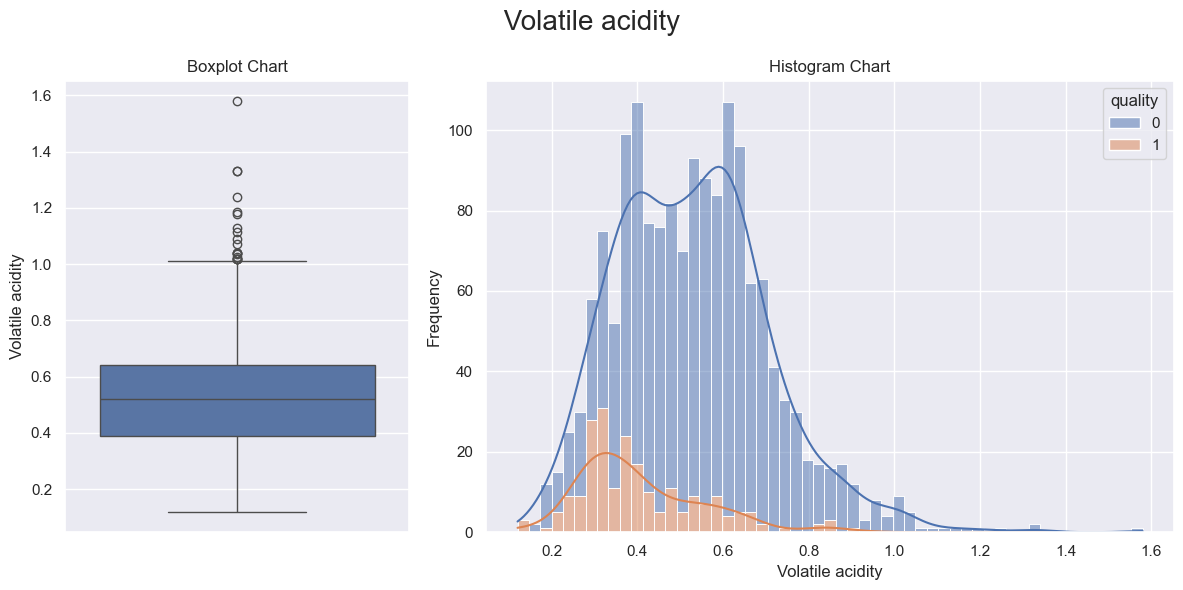

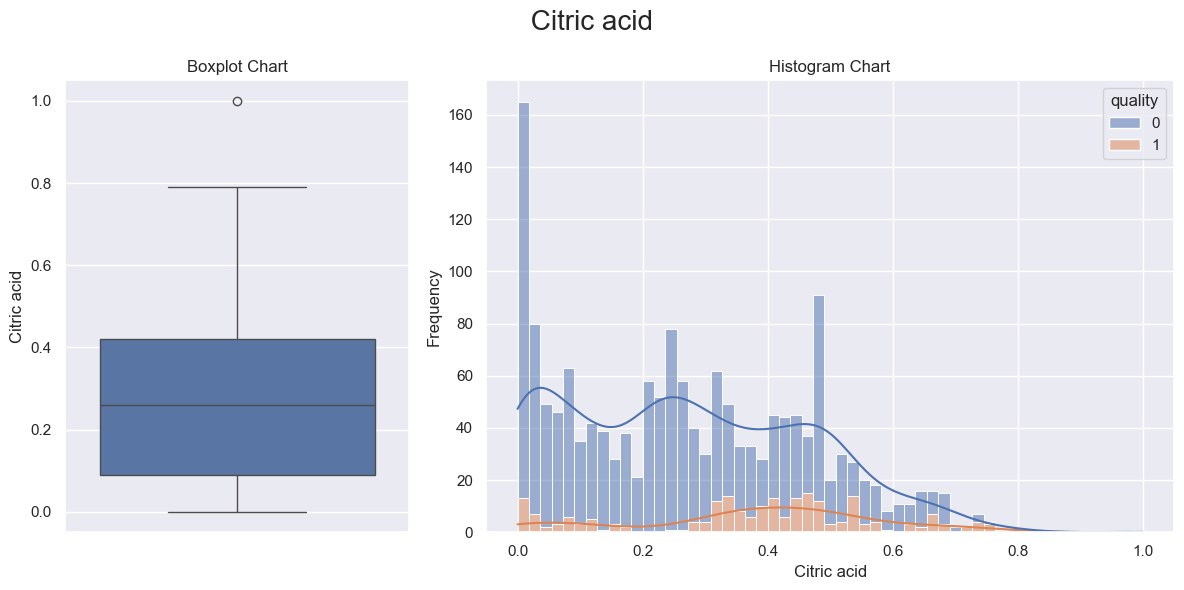

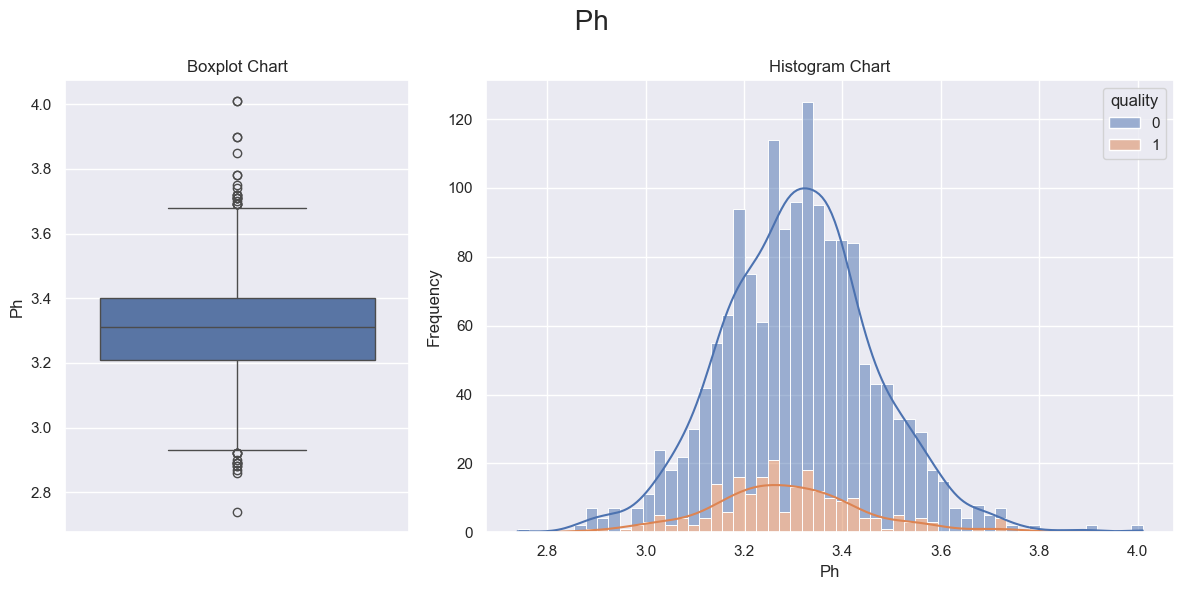

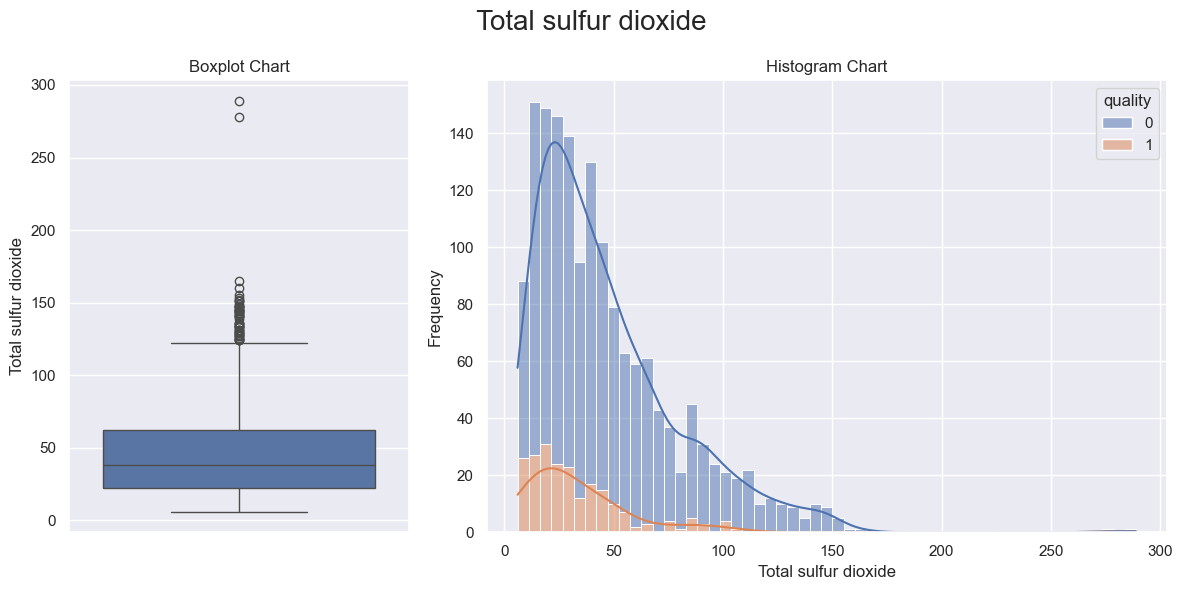

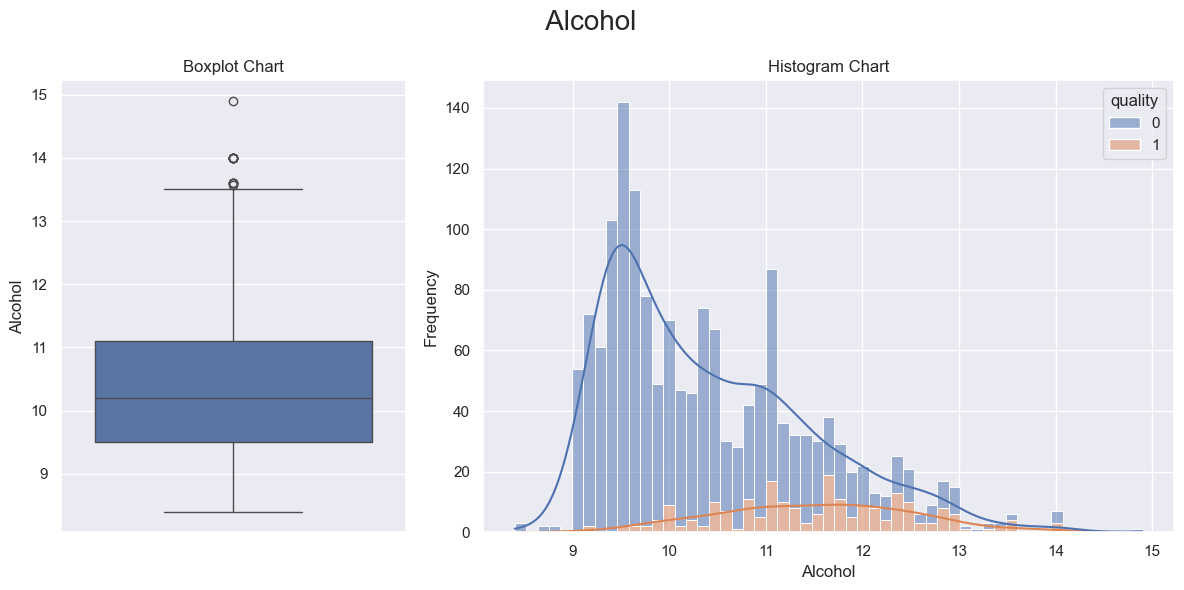

In [7]:
# Define a function to Capitalize the first element of string and remove '_' character
def title(name):
    return (' '.join(word.capitalize()for word in name.split('_')))


# Distribution of Categorical Features
def plot_continious_distribution(df, column, hue):

    width_ratios = [2, 4]
    gridspec_kw = {'width_ratios':width_ratios}
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw = gridspec_kw) 
    fig.suptitle(f' {title(column)} ', fontsize=20) 
    
    sns.boxplot(df[column], ax=ax[0])
    ax[0].set_title('Boxplot Chart')
    ax[0].set_ylabel(title(column))

    sns.histplot(x = df[column], kde=True, ax=ax[1], hue=df[hue], multiple = 'stack', bins=55)
    ax[1].set_title('Histogram Chart')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel(title(column))

    plt.tight_layout()
    plt.show()
for conti in continuous :
    plot_continious_distribution(df, conti, 'quality')    

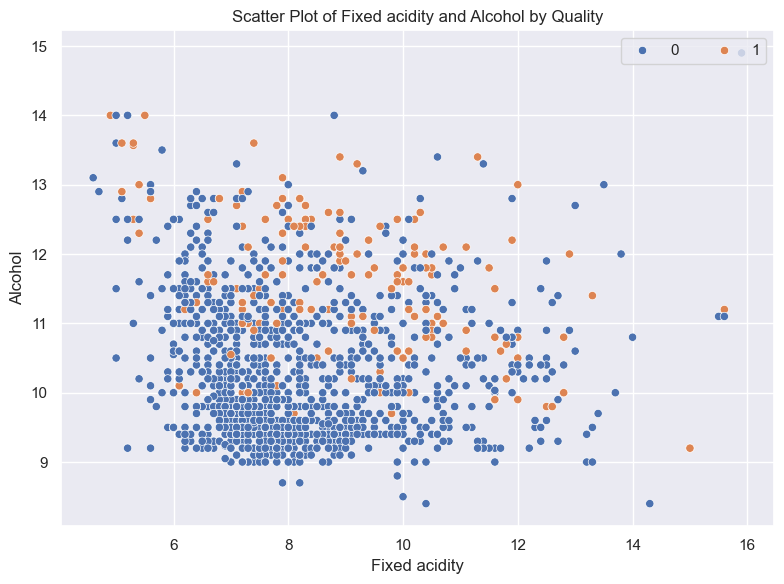

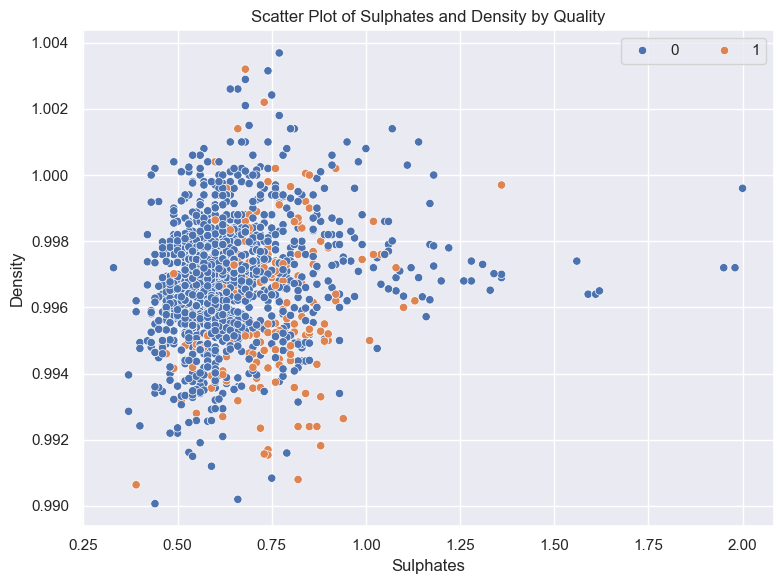

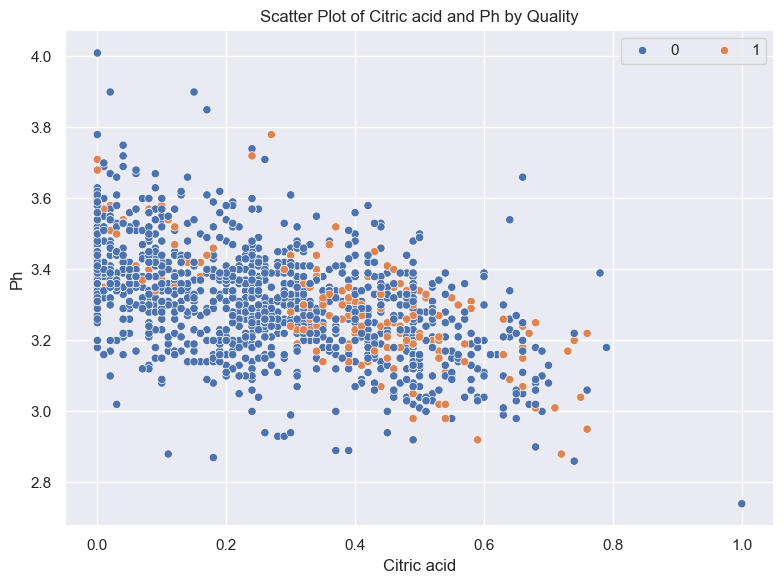

In [8]:
# Define a Function for Scatter Plot
def scatter_plot(data, x, y, hue):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=data, x=x, y=y, hue=hue)
    plt.title(f'Scatter Plot of {title(x)} and {title(y)} by {title(hue)}')
    plt.xlabel(title(x))
    plt.ylabel(title(y))
    plt.legend(title=None, ncol=2, loc='upper right')

    plt.tight_layout()
    plt.show()

scatter_plot(data=df, x="fixed acidity", y="alcohol", hue="quality")
scatter_plot(data=df, x="sulphates", y="density", hue="quality")
scatter_plot(data=df, x="citric acid", y="pH", hue="quality")

## Data Preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
stc = StandardScaler()

stc_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Apply Standard Scaler to the selected columns
df[stc_cols] = stc.fit_transform(df[stc_cols])

## Training and Evaluating Different Models

In [10]:
from sklearn.model_selection import train_test_split 

x = df.drop(['quality'], axis=1)
y = df['quality']  # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
#Importing the Libraries
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [21]:
# List of Models to Try
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training accuracy: {name}', model.score(x_train, y_train))
    print(f'Test accuracy: {name}', accuracy_score(y_test, y_pred))
    print()

Training accuracy: Decision Tree 1.0
Test accuracy: Decision Tree 0.871875

Training accuracy: Random Forest 1.0
Test accuracy: Random Forest 0.9

Training accuracy: Gradient Boosting 0.9601250977326036
Test accuracy: Gradient Boosting 0.88125

Training accuracy: K-Nearest Neighbors 0.9108678655199375
Test accuracy: K-Nearest Neighbors 0.878125



In [25]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [None,8,12],
    'min_samples_leaf': [2,4,6],
    'min_samples_split': [2,5,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [42]
}

# Initialize the Random Forest Classifier
rf_model_tuned = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model_tuned, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
rf_best_params = grid_search.best_params_

# Retrain the model with the best parameters
rf_model_best = RandomForestClassifier(**rf_best_params)
rf_model_best.fit(x_train, y_train)

# Predict using the updated features
y_pred_best = rf_model_best.predict(x_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred_best)

print(f'Best Parameters: {rf_best_params}')
print(f'R-squared (Tuned Random Forest): {round(accuracy, 3)}')

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}
R-squared (Tuned Random Forest): 0.912


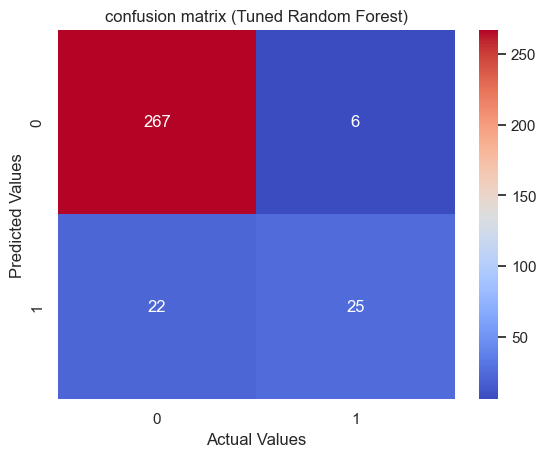

In [29]:
# Visualize confusion matrix for Random Forest Classifier
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test,y_pred_best),annot= True, cmap = 'coolwarm', fmt='.0f')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('confusion matrix (Tuned Random Forest)')
plt.show()

In [30]:
# Visualize Classification report for Random Forest Classifier
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       273
           1       0.81      0.53      0.64        47

    accuracy                           0.91       320
   macro avg       0.87      0.75      0.80       320
weighted avg       0.91      0.91      0.90       320



### Summary and Conclusion

In this project, I focused on predicting wine quality using various data preprocessing techniques and a machine learning model. The steps and methodologies employed are as follows:

1. Data Cleaning and Preprocessing:
   - Target Column Simplification: The target column, quality, was simplified from multiple categories to two categories to reduce complexity and improve model performance.

2. Data Visualization:
   - Appropriate visualizations were created to explore and understand the data patterns and relationships, providing valuable insights into the dataset.

3. Data Standardization:
   - Data standardization was performed to normalize the features, ensuring consistency across the dataset.

4. Model Training and Optimization:
   - The performance of the Random Forest model was optimized using Grid Search.
   - This optimization process led to a significant improvement in model accuracy, achieving a final accuracy of 91.2%.

These steps ensured a comprehensive analysis and model training process, leading to a highly accurate prediction model for wine quality.
### *Developed by Hosein Mohammadi*
GitHub : https://github.com/Hosein541

Kaggle : https://www.kaggle.com/hoseinnnnnnn 

Gmail : Huseinmohammadi83@gmail.com